In [1]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


In [2]:
df= pd.read_csv('/kaggle/input/spam-email-dataset/emails.csv')
df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [3]:
print(df.shape)
print(df['spam'].value_counts())

(5728, 2)
spam
0    4360
1    1368
Name: count, dtype: int64


In [4]:
df.duplicated().sum()

33

In [5]:
df.drop_duplicates(keep= 'first')

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


# EDA :Exploratory data analysis

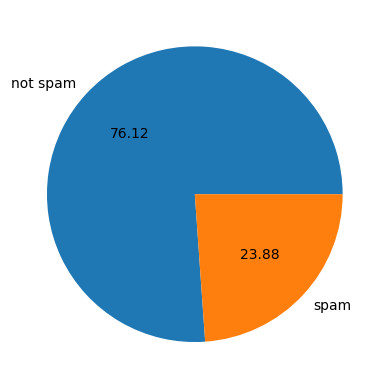

In [6]:
import matplotlib.pyplot as plt
plt.pie(df['spam'].value_counts(),labels = ['not spam','spam'],autopct = "%0.2f")
plt.show()

# NOTE: Data distribution is uneven

In [7]:
import nltk
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [8]:
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [9]:
df.head(10)

,text,spam,num_words,num_sentence
0,Subject: naturally irresistible your corporate...,1,325,11
1,Subject: the stock trading gunslinger fanny i...,1,90,1
2,Subject: unbelievable new homes made easy im ...,1,88,4
3,Subject: 4 color printing special request add...,1,99,5
4,"Subject: do not have money , get software cds ...",1,53,9
5,"Subject: great nnews hello , welcome to medzo...",1,85,3
6,Subject: here ' s a hot play in motion homela...,1,1704,72
7,Subject: save your money buy getting this thin...,1,97,9
8,Subject: undeliverable : home based business f...,1,122,3
9,Subject: save your money buy getting this thin...,1,97,9


In [10]:
df[['num_words','num_sentence']].describe()

,num_words,num_sentence
count,5728.000000,5728.000000
mean,327.982542,19.483240
std,418.833125,35.936051
min,3.000000,1.000000
25%,102.000000,7.000000
50%,211.000000,12.000000
75%,403.000000,22.000000
max,8479.000000,1565.000000


In [11]:
df[df['spam'] == 1][['num_words','num_sentence']].describe()

,num_words,num_sentence
count,1368.000000,1368.000000
mean,267.896199,18.274123
std,451.623124,28.130434
min,5.000000,1.000000
25%,80.000000,6.000000
50%,141.000000,11.000000
75%,252.000000,18.000000
max,6131.000000,438.000000


In [12]:
df[df['spam'] == 0][['num_words','num_sentence']].describe()

,num_words,num_sentence
count,4360.000000,4360.000000
mean,346.835321,19.862615
std,406.228875,38.051542
min,3.000000,1.000000
25%,120.000000,7.000000
50%,240.000000,13.000000
75%,440.250000,22.000000
max,8479.000000,1565.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

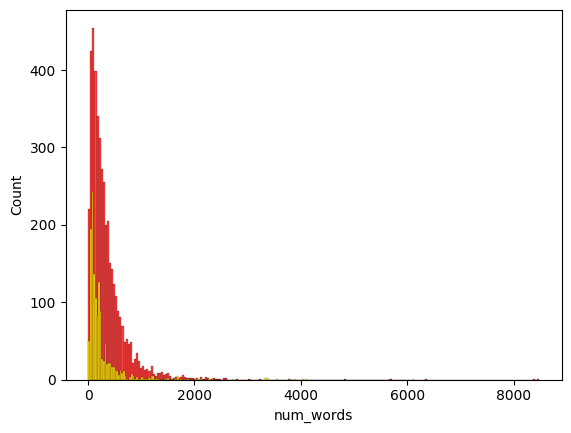

In [13]:
import seaborn as sns
sns.histplot(df[df['spam']==0]['num_words'],color ='red')
sns.histplot(df[df['spam']==1]['num_words'],color = 'yellow')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

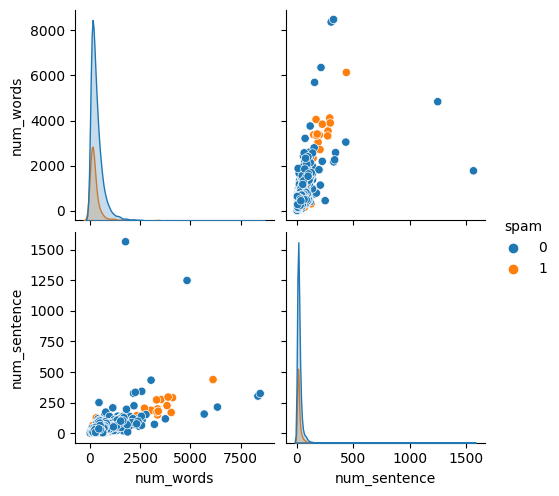

In [14]:
sns.pairplot(df,hue = 'spam')

In [15]:
sample= df.drop(columns = 'text',axis = 0)

<Axes: >

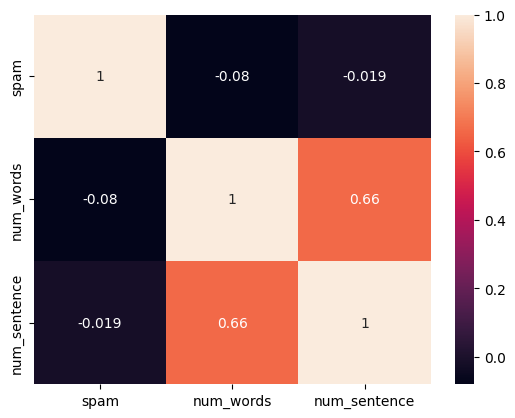

In [16]:
sns.heatmap(sample.corr(),annot = True)

In [17]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(PorterStemmer().stem(i))
        
    return " ".join(y)
    

In [18]:
df['text'] = df['text'].apply(transform_text)

In [19]:
df['text'][0]

'subject natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget 100 satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest'

In [20]:
spam_corpus =[]
for msg in df[df['spam']==1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [21]:
len(spam_corpus)

174630

<Axes: xlabel='Count', ylabel='Word'>

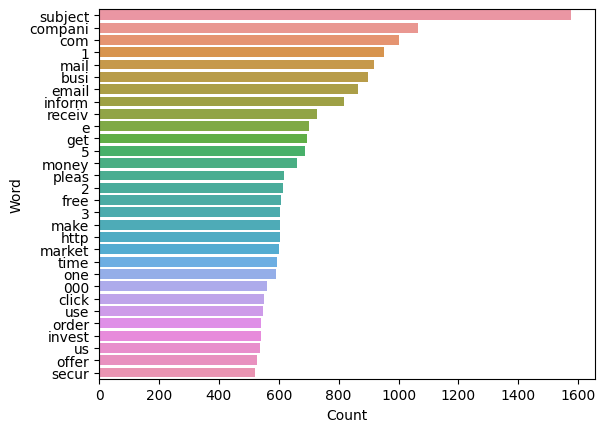

In [22]:
from collections import Counter
word_counts = Counter(spam_corpus)
top_30_words = word_counts.most_common(30)
new = pd.DataFrame(top_30_words, columns=['Word', 'Count'])
sns.barplot(x='Count', y='Word', data=new)

# model Building

In [23]:
cv= CountVectorizer()
X = cv.fit_transform(df['text']).toarray()

In [24]:
X.shape

(5728, 29220)

In [25]:
y = df['spam'].values

In [26]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [28]:
svc = SVC(kernel= 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()
dc = DecisionTreeClassifier(max_depth=5)
rc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators =50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [29]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'MNB':mnb,
    'BNB':bnb,
    'GNB':gnb,
    'DC':dc,
    'RC':rc,
    'RFC':rfc,
    'ABC':abc,
    'BC':bc,
    'ETC':etc,
    'GB':gbdt,
    'XGB':xgb
    }

In [30]:
def train_classifier(clf,X_tain,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy =accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision
    

In [31]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.806282722513089, 0.6349206349206349)

In [32]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    real_accuracy,real_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For --- ",name)
    print("Accuracy - ",real_accuracy)
    print("Precision - ",real_precision)
    
    accuracy_scores.append(real_accuracy)
    precision_scores.append(real_precision)



For ---  SVC
Accuracy -  0.806282722513089
Precision -  0.6349206349206349
For ---  KN
Accuracy -  0.900523560209424
Precision -  0.9444444444444444
For ---  MNB
Accuracy -  0.9895287958115183
Precision -  0.9695945945945946
For ---  BNB
Accuracy -  0.9808027923211169
Precision -  0.975177304964539
For ---  GNB
Accuracy -  0.9537521815008726
Precision -  0.9340659340659341
For ---  DC
Accuracy -  0.9171029668411868
Precision -  0.7945619335347432
For ---  RC
Accuracy -  0.9851657940663177
Precision -  0.972318339100346
For ---  RFC
Accuracy -  0.9677137870855148
Precision -  1.0
For ---  ABC
Accuracy -  0.962478184991274
Precision -  0.9049180327868852
For ---  BC
Accuracy -  0.9720767888307156
Precision -  0.9417808219178082
For ---  ETC
Accuracy -  0.9642233856893543
Precision -  0.9920948616600791
For ---  GB
Accuracy -  0.9528795811518325
Precision -  0.9609375
For ---  XGB
Accuracy -  0.987783595113438
Precision -  0.9693877551020408


In [33]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(by ="Accuracy", ascending = False)

In [34]:
performance_df

,Algorithm,Accuracy,Precision
2,MNB,0.989529,0.969595
12,XGB,0.987784,0.969388
6,RC,0.985166,0.972318
3,BNB,0.980803,0.975177
9,BC,0.972077,0.941781
7,RFC,0.967714,1.000000
10,ETC,0.964223,0.992095
8,ABC,0.962478,0.904918
4,GNB,0.953752,0.934066
11,GB,0.952880,0.960938
